# Analysis of portfolio performance measures

In this notebook, you will learn about the different portfolio performance measures and how to code the same. The following different measures are covered in this notebook:

1. Annualised Returns
2. Annualised Volatility
3. Sharpe Ratio
4. Sortino Ratio
5. Beta
6. Treynor Ratio
7. Information Ratio
8. Skewness
9. Kurtosis
10. Maximum Drawdown

You will learn to calculate these measures on the strategy returns of multi-factor portfolio covered in the previous section.

In [1]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import monthly_returns_heatmap as mrh
from tabulate import tabulate
import cvxpy as cp
import math
import seaborn as sns
# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

## Import the Data

In [2]:
list_of_tickers = ["0941.HK", "BABA", "EBS", "AEIS", "ABMD", "VRTX", "UBI.PA", "DB1.DE", "BAYN,DE", "CHKP", "REMX", "GDX", "SLV", "XLB", "TME", "0883.HK", "INTC", "SWKS", "TH9A.F"]
# ["BABA", "GOOGL", "FB", "INGR", "INTC", "JNJ", "LYB", "MSFT", "UNM", "VTRS", "AGRO.ME", "SBRCY", "IXC", "AAXJ", "EWZ", "ECH", "PICK", "EWS", "EZA", "EWU", "SCHH", "HYEM", "VGK", "VNQI"]
index = ['SPY']
start = datetime.datetime(2010,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
index_df = pdr.DataReader(index, 'yahoo', start, end)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'BAYN,DE', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [3]:
data_pc = f.pct_change()
data_pc = pd.DataFrame(data_pc["Adj Close"])
index_pc = index_df.pct_change()
index_pc = pd.DataFrame(index_pc["Adj Close"])
data_pc.head(5)

Symbols,0941.HK,BABA,EBS,AEIS,ABMD,VRTX,UBI.PA,DB1.DE,CHKP,REMX,GDX,SLV,XLB,TME,0883.HK,INTC,SWKS,TH9A.F,"BAYN,DE"
Date,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.016188,0.032493,0.001146,0.032439,NaN,NaN,0.006789,NaN,0.032460,0.041717,0.031221,NaN,NaN,0.023529,0.044398,NaN,NaN
2010-01-05,0.008293,NaN,-0.002896,0.012203,-0.024027,-0.033002,0.039961,-0.002046,-0.008502,NaN,0.009642,0.016251,0.003234,NaN,0.057190,-0.000479,0.015519,NaN,NaN
2010-01-06,0.006169,NaN,0.001452,0.057107,-0.015240,-0.017532,0.051233,-0.012304,0.005322,NaN,0.024289,0.019989,0.016994,NaN,0.006182,-0.003354,-0.009302,NaN,NaN
2010-01-07,-0.002044,NaN,-0.003626,-0.025810,0.000000,-0.012610,-0.006769,-0.017647,-0.002353,NaN,-0.004864,0.001680,-0.007779,NaN,-0.001536,-0.009615,-0.011402,NaN,NaN


In [4]:
index_pc.head(5)

Symbols,SPY
Date,
2009-12-31,NaN
2010-01-04,0.016960
2010-01-05,0.002647
2010-01-06,0.000704
2010-01-07,0.004222


In [5]:
portfolio = pd.DataFrame()
portfolio['portfolio_returns'] = data_pc.mean(axis=1)
portfolio['portfolio_cum_return'] = (portfolio['portfolio_returns']+1).cumprod()
portfolio['market_returns'] =  index_pc.mean(axis=1)
portfolio['market_cum_return'] = (portfolio['market_returns']+1).cumprod()
portfolio.head(5)

,portfolio_returns,portfolio_cum_return,market_returns,market_cum_return
Date,,,,
2009-12-31,NaN,NaN,NaN,NaN
2010-01-04,0.026238,1.026238,0.016960,1.016960
2010-01-05,0.006524,1.032933,0.002647,1.019652
2010-01-06,0.009357,1.042599,0.000704,1.020370
2010-01-07,-0.007455,1.034826,0.004222,1.024677


## Annualised Returns

In [6]:
# The annual risk-free rate of 2% is assumed
risk_free_rate = 0.02

# Total number of trading days in a year is 252
trading_days = 252

# Calculate the average daily returns
average_daily_returns = portfolio['portfolio_returns'].mean()

# Calculate the annual returns by multiplying average daily returns with number of trading days
annual_returns = ((1 + average_daily_returns)**(trading_days) - 1)*100

'Среднегодовая доходность %.2f%%' % annual_returns

'Среднегодовая доходность 19.22%'

### Annualised Volatility
The volatility is the standard deviation of the returns of the portfolio. Annualised Volatility can be calculated by multiplying the daily volatility with the square root of number of trading days in a year.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/0EdOjUVz/PA1.PNG)

In [7]:
# Calculate the daily standard deviation
daily_std_dev = portfolio['portfolio_returns'].std()

# Calculate the annualised volatility
annual_volatility = daily_std_dev * np.sqrt(trading_days) * 100
'Средногодовая волатильность %.2f%%' % annual_volatility

'Средногодовая волатильность 17.86%'

### Sharpe Ratio
The Sharpe ratio is the excess return calculated as total returns less the risk-free rate of return per unit of volatility. Generally, risk-free return is the return on the risk-free assets such as government bonds. The excess returns are due to the 'extra risk' taken by the investor on investing in risky assets.

It tells whether the returns on a portfolio are due to good investment decision or the result of excessive risk taken. Higher Sharpe ratio is always preferable over the lower ones. 

The Sharpe Ratio can be used to compare the portfolio with the benchmark to get to know how your portfolio is repaying for the risk taken on the investment.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/ys4mgeBk/PA2.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_p $ = Standard deviation of the portfolio returns

In [8]:
# Calculate the daily risk-free return by dividing the annual risk-free return by number of trading days
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = portfolio['portfolio_returns'] - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
# It is multiplied by square root of trading days to get the annualized value
sharpe_ratio = (excess_daily_returns.mean() /
                excess_daily_returns.std()) * np.sqrt(trading_days)
'Коэффициент Шарпа %.2f' % sharpe_ratio

'Коэффициент Шарпа 0.87'

### Sortino Ratio
In the Sortino ratio, the denominator of the Sharpe ratio, the total standard deviation is replaced with the downside deviation. The downside deviation is the standard deviation of negative asset return.

It differentiates the harmful volatility from the total volatility by using the standard deviation of negative returns only. Since an investor is concerned only about the downside volatility, Sortino ratio is a good measure in comparing the highly volatile portfolios whereas the Sharpe ratio is better at analyzing portfolios with low volatility. The probability of large loss will be low if the value of the Sortino ratio is high.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/bAlslhZL/PA3.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \sigma_d $ = Standard deviation of the negative asset returns

In [9]:
# Define a variable net_returns to calculate daily returns subtracted by average daily returns
net_returns = portfolio['portfolio_returns'] - average_daily_returns

# Define a variable negative_returns to keep only negative net_returns
negative_returns = net_returns[net_returns < 0]

# Calculate the standard deviation of negative returns by defining semi_dev variable
semi_dev = np.sqrt(np.sum((negative_returns**2))/len(returns))

# Calculate the Sortino ratio using the above-mentioned formula
# It is multiplied by the square root of trading days to get the annualized value
sortino_ratio = (excess_daily_returns.mean()/semi_dev) * np.sqrt(trading_days)
'Коэффициент Сортино %.2f' % sortino_ratio

NameError: name 'returns' is not defined

### Beta
The beta is used to capture the relationship between the portfolio returns and the market returns.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/YoH8EJ8W/PA4.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_m $ = Market Returns

In [ ]:
# Calculate the covariance between market returns and portfolio returns
covariance_matrix = portfolio[['market_returns', 'portfolio_returns']].cov()
covariance_value = covariance_matrix.iloc[0]['portfolio_returns']

# Calculate the market variance
market_variance = portfolio['market_returns'].var()

# Calculate the beta value using the given formula
beta = covariance_value/market_variance
'Beta = %.2f' % beta

### Treynor Ratio
Treynor Ratio is the variation in the denominator of the Sharpe ratio by replacing the total standard deviation with the beta of the portfolio. It also highlights the risk-adjusted performance of the portfolio. Higher the Treynor ratio, more suitable the investment is. The ratio is based on historical returns data, it is not necessary it will replicate in the future. The higher ratio tells that investment is good but it does not quantify how much good the investment is.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/Ds106Ffi/PA5.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_f $ = Risk-free Returns
<br>$ \beta_p $ = Portfolio's Beta

In [ ]:
# Calculate the Treynor ratio using the above formula
# It is multiplied by trading days to get the annualized value
treynor_ratio = (excess_daily_returns.mean()*trading_days)/beta
'Коэффициент Трейнора %.2f' % treynor_ratio

### Information Ratio
Information ratio tells the portfolio's return in excess of the benchmark's return with respect to the volatility of these returns.  It tells an investor how much excess return is generated from the excess risk taken with respect to its benchmark. A Higher ratio implies that the fund is more consistent and better performing. The range between 0.4-0.6 is considered good and the value greater than 1 is considered excellent but is found quite rare.

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/itfI2JQC/PA6.PNG)

where,

$ R_p $ = Portfolio Returns
<br>$ R_m $ = Market Returns
<br>$ \sigma_{p,m} $ = Standard deviation of the difference between portfolio and market returns

In [ ]:
# Calculate the Treynor Ratio using the above formula
# It is multiplied by square root of trading days to get the annualized value
information_ratio = ((average_daily_returns - portfolio['market_returns'].mean()) /
                     (portfolio['portfolio_returns'] - portfolio['market_returns']).std()) * np.sqrt(trading_days)
'The information raio is %.2f' % information_ratio

### Skewness
Skewness is the degree of distortion from the normal distribution. It can be either positive or negative. Positive skew means that the right tail is longer than the left tail and vice-versa for the negative kurtosis. It is important to determine the kurtosis as it better judges the likelihood of events falling in the tail of the distribution rather than focusing only on the average. A positively skewed investment in the portfolio indicates frequent small losses and few large gains while a negatively skewed investment implies frequent small gains and few large losses.

In [ ]:
# Calculate the skewness using the skew() function
skewness = portfolio['portfolio_returns'].skew()
'The skewness is %.2f' % skewness

### Kurtosis
Kurtosis, like skewness, is a measure of distribution. It explains how the tails of a given distribution differ from the tails of the normal distribution. It tells whether the tails of the distribution contain extreme values or not. Kurtosis tells about the heaviness in the tails while skewness tells about the symmetry.

Kurtosis can be mesokurtic, leptokurtic and platykurtic. Mesokurtic show the same extreme value characteristics as the normal distribution. Leptokurtic has positive excess distribution. This distribution has long tails and is more concentrated at the mean. Investment in this type of distribution is risky. The Platykurtic distribution shows negative excess distribution. Investment in this type of distribution is considered less risky.

In [ ]:
# Calculate the excess kurtosis using the kurtosis() function
excess_kurtosis = portfolio['portfolio_returns'].kurtosis()
'The kurtosis is %.2f' % excess_kurtosis

### Maximum Drawdown
Maximum Drawdown is a key measure to assess the risk possess by a given portfolio. It measures the peak-to-trough decline in the value of the portfolio and is quoted as the percentage of the peak value. The formula to calculate the Maximum Drawdown is:

![title](https://d2a032ejo53cab.cloudfront.net/Glossary/Mn5OxlcB/PA7.PNG)

where,

$ P $ = Maximum value before the largest drop
<br>$ L $ = Lowest value before the new high

Maximum Drawdown only measures the size of the largest loss but it doesn't say how frequently the losses are occurring and how much time it took to recover from those losses. A low value of maximum drawdown is preferred as it indicates that losses from the investment in the portfolio are less. 

In [ ]:
# Cumulative product of portfolio returns
cumprod_ret = (portfolio['portfolio_returns'].dropna()+1).cumprod()*100

# Cumulative product of market returns
cumprod_market_ret = (portfolio['market_returns'].dropna()+1).cumprod()*100

# Convert the index in datetime format
cumprod_ret.index = pd.to_datetime(cumprod_ret.index)

# Define a variable trough_index to store the index of lowest value before new high
trough_index = (np.maximum.accumulate(cumprod_ret) - cumprod_ret).idxmax()

# Define a variable peak_index to store the index of maximum value before largest drop
peak_index = cumprod_ret.loc[:trough_index].idxmax()

# Calculate the maximum drawdown using the given formula
maximum_drawdown = 100 * \
    (cumprod_ret[trough_index] - cumprod_ret[peak_index]) / \
    cumprod_ret[peak_index]
'The maximum drawdown is %.2f%%' % maximum_drawdown

In [ ]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the cumulative product of returns
plt.plot(cumprod_ret)

# Plot to represent the peak and trough, represented by red dots.
plt.plot([peak_index, trough_index], [cumprod_ret[peak_index], cumprod_ret[trough_index]], 'o', color='r',
         markersize=5)

# Define the label for the title of the figure
plt.title("Cumulative Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Define the label for the legend
plt.legend(["Cumulative Returns", "Peak and Trough"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

logging.getLogger('matplotlib.font_manager').disabled = True

### Plot the running maximum drawdown

In [ ]:
# Calculate the running maximum value for the cumulative returns
running_max = np.maximum.accumulate(cumprod_ret)

# Set value of the running_max to 1 if it is less than 1
running_max[running_max < 1] = 1

# Calculate the running maximum drawdown
running_max_drawdown = (cumprod_ret/running_max)-1

# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the running maximum drawdown
plt.plot(running_max_drawdown, color='r')

# Define the label for the title of the figure
plt.title("Running Maximum Drawdown", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel('Year', fontsize=14)
plt.ylabel('Maximum Drawdown', fontsize=14)

# Define the label for the legend
plt.legend(["Running Maximum Markdown"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)

# Fill the space between the plot
plt.fill_between(running_max_drawdown.index,
                 running_max_drawdown, alpha=0.5, color='r', linewidth=0)

plt.show()

### Plot the histogram of returns of the portfolio

In [ ]:
# Drop the NULL values for the histogram plot
portfolio.dropna(inplace=True)

# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the histogram of returns of the portfolio
plt.hist(portfolio['portfolio_returns'], histtype='bar', alpha=0.5, ec='black')

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Returns in %", fontsize=14)
plt.ylabel("Number of Days", fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot the heatmap of monthly returns of the portfolio vs year

In [ ]:
# Average monthly returns of the portfolio
portfolio_monthly_mean = portfolio.resample('M').mean()

# Total count of each month
portfolio_monthly_count = portfolio.resample('M').count()

# Calculation of monthly returns of the portfolio
portfolio_monthly_ret = (portfolio_monthly_mean +
                         1)**(portfolio_monthly_count) - 1

# Heatmap of monthly returns of portfolio vs year
mrh.plot(portfolio_monthly_ret['portfolio_returns'], figsize=(10, 7))

# Define the label for the title of the figure
plt.title('Monthly Returns (%)', fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel('Month', fontsize=14)
plt.ylabel('Year', fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### Plot the cumulative returns of the portfolio vs Index

In [ ]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Here we have multiplied returns by a factor of 2 as we can take the leverage of 2.
cumprod_ret_leverage_2 = (portfolio['portfolio_returns']*2+1).cumprod()*100

# Plot the cumulative product of portfolio returns
plt.plot(cumprod_ret_leverage_2, label='Portfolio')

# Plot the cumulative product of market(S&P500) returns
plt.plot(cumprod_market_ret, label='SPY')

# Define the label for the title of the figure
plt.title("Index Vs Portfolio", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Year", fontsize=14)
plt.ylabel("Annualized Returns", fontsize=14)

# Define the label for the legend
plt.legend(["Portfolio", "SPY"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()

### Все расчетные параметры

In [ ]:
# Form a table to get the values of all risk measures in structured manner
table = pd.DataFrame({'Параметры': ['Annual Returns', 'Annual Volatility', 'Sharpe Ratio', 'Sortino Ratio',
                                     'Beta', 'Treynor Ratio', 'Information Ratio', 'Skewness', 'Kurtosis',
                                     'Maximum Drawdown'],
                      'Значения': [annual_returns, annual_volatility, sharpe_ratio, sortino_ratio, beta,
                                treynor_ratio, information_ratio, skewness, excess_kurtosis, maximum_drawdown]})

print(tabulate(table, headers='keys', tablefmt='psql'))

# Portfolio Strategy based on Kelly Criterion

In this notebook, you will learn how to create a Kelly portfolio. 
The process for doing that is as follows:
1. Import the libraries and data 
2. Calculate the daily returns
3. Create the Kelly criterion
4. Create the Kelly portfolio

## Calculate the daily returns
While optimizing the Kelly Criterion, you multiply the daily returns of the stocks with their corresponding weights to get the returns of the portfolio. For the first step towards calculating the Kelly criterion, you will create a dataframe that will contain the daily percentage change of each of the stocks.

In [ ]:
data_pc.head()

In [ ]:
# Drop the first row containing the null values
data_pc.dropna(inplace=True)

# Calculate the cumulative percentage returns of each stock
data_cumulative_returns = (data_pc+1).cumprod()*100

In [ ]:
# Print the top 5 rows of the dataframe
data_cumulative_returns.head()

In [ ]:
# Plot the returns of both the stocks
plt.figure(figsize=(10, 7))
for column in data_pc.columns.values:
    plt.plot(data_pc.index, data_cumulative_returns[column], label=column)

plt.legend(loc='best', fontsize=12)
plt.title('Stock Performance', fontsize=16)
plt.ylabel('Stock Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid()
plt.show()

## Create the Kelly Criterion

Each stock in the portfolio has a certain percentage weight of the capital allocated to it. So, while optimizing the weights of each stock in the portfolio, you need to create an array of weights that has the same number of weight variables as the number of stocks. You can get the number of the stocks in the portfolio using the below command.

In [ ]:
# Save the number of stocks in a variable
no_of_stocks = data_pc.shape[1]
no_of_stocks

You can use the cvxpy library to create an array containing weight variables. You need to specify the number of stocks as the input for this function.

In [ ]:
weights = cp.Variable(no_of_stocks)
weights.shape

While calculating the portfolio returns of a day, you need to multiply the stock returns with the corresponding weight allocation, as shown below.

In [ ]:
# Save the portfolio returns in a variable
portfolio_returns = (np.array(data_pc) @ weights)
portfolio_returns

In [ ]:
(np.array(data_pc) @ weights)

The final portfolio value or the utility of the portfolio can be computed using the logarithmic summation of the daily portfolio returns.

In [ ]:
final_portfolio_value = cp.sum(cp.log(1+portfolio_returns))
final_portfolio_value

The output tells us that the final_portfolio_value is an expression and is concave in nature and its value is unknown

The objective of this exercise is to maximise the Kelly criterion. To do this, you can create a parameter called 'objective' and assign the maximisation condition to it. The Maximize function of the cvxpy library is used for this purpose.

In [ ]:
objective = cp.Maximize(final_portfolio_value)
objective

The output tells us that the objective is a Maximize function over an expression and the expression is concave in nature and its value is unknown

Before you solve the objective, you need to remember that there are certain constraints on the weights of the portfolio.

1. The weights should positive, as you are considering only a long-only scenario.
2. The sum of weights should be less than or equal to 1, as you are not considering leveraging.

In [ ]:
constraints = [0.0 <= weights, cp.sum(weights) == 1]
constraints

Here the constraints specify that the first one is an inequality constraint and its value is a constant zero. While the second is an equality constraint between an affine expression whose value is equal to a constant non-negative value

Now, you can combine both the objective and the constraints to create a problem statement. You can do this by using the Problem class of the cvxpy library, as shown below.

In [ ]:
problem = cp.Problem(objective, constraints)
problem

Here the output describes the entire problem including all the previously described expression into a one single statement

You can use the solve method of the problem class to get the best weight combination as shown below

In [ ]:
# The optimal objective value is returned by `prob.solve()`.
problem.solve()

# The optimal value for w is stored in `w.value`.
print(weights.value)

## Create Kelly portfolio
These weights were generated using the stock return data. Now you should create the Kelly portfolio by allocating these weights to the corresponding stocks and measure the performance of the portfolio.

You can get the daily portfolio returns on the data by multiplying the weight values with stock returns as shown.

In [ ]:
kelly_portfolio_returns = ((data_pc)*(weights.value)).sum(axis=1)
kelly_portfolio_returns.head()

You can get the daily portfolio value buy adding 1 to the daily returns and then taking a cumulative product of the daily returns.

In [ ]:
kelly_portfolio_value = (1+(kelly_portfolio_returns)).cumprod()
kelly_portfolio_value.head()

You can calculate the annualised returns of the Kelly portfolio using the below formula.

In [ ]:
kelly_annualized_returns = (
    (kelly_portfolio_value[-1])**(252/len(data_pc)))-1

# Print the annualized returns of the Kelly portfolio
kelly_annualized_returns

Now, you can compare the performance of the Kelly portfolio with that of the equal weight portfolio. To do this, you need to create an equal weight portfolio by giving 50% to each of the stocks or by simply taking the average of their returns.

In [ ]:
equal_weight_portfolio = (1+((data_pc).mean(axis=1))).cumprod()
equal_weight_portfolio.head()

In [ ]:
# Plot the percentage returns of Kelly and Equal Weight portfolios
plt.figure(figsize=(10, 7))
plt.plot(kelly_portfolio_value*100, label='Kelly Portfolio Performance')
plt.plot(equal_weight_portfolio*100,
         label='Equal Weight Portfolio Performance')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.title('Portfolio Optimization based on Kelly Criterion', fontsize=16)
plt.legend(loc='best', fontsize=12)
plt.grid()
plt.show()

### Корреляция и веса в портфеле

In [63]:
list_of_tickers = ["BABA", "GOOGL", "FB", "INGR", "INTC", "JNJ", "LYB", "MSFT", "UNM", "VTRS", "AGRO.ME", "SBERP.ME", "EPD", "ICE", "BMY", "CI", "TTE", "BTI"]
# ["SBER.ME", "YNDX.ME", "AGRO.ME", "GAZP.ME", "GMKN.ME"]
# ["VTBR.ME", "MLRYY", "AGRO.ME", "NVTK.ME", "PLZL.ME"]
index = ['SPY']
start = datetime.datetime(2010,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
index_df = pdr.DataReader(index, 'yahoo', start, end)

In [64]:
data_pc = f.pct_change()
data_pc = pd.DataFrame(data_pc["Adj Close"])
index_pc = index_df.pct_change()
index_pc = pd.DataFrame(index_pc["Adj Close"])
data_pc.head(5)

Symbols,BABA,GOOGL,FB,INGR,INTC,JNJ,LYB,MSFT,UNM,VTRS,AGRO.ME,SBERP.ME,EPD,ICE,BMY,CI,TTE,BTI
Date,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,0.010920,NaN,0.015395,0.023529,0.004192,NaN,0.015420,0.021516,0.015735,NaN,NaN,0.039795,0.005076,0.015050,0.031188,0.028732,0.008506
2010-01-05,NaN,-0.004404,NaN,0.016846,-0.000479,-0.011596,NaN,0.000323,0.014544,-0.010684,NaN,NaN,0.011023,-0.037654,-0.015607,0.016772,0.002277,-0.001074
2010-01-06,NaN,-0.025209,NaN,0.015905,-0.003354,0.008134,NaN,-0.006137,0.008898,-0.009719,NaN,NaN,0.001817,-0.030841,-0.000396,-0.002163,-0.000303,-0.003224
2010-01-07,NaN,-0.023280,NaN,-0.044684,-0.009615,-0.007137,NaN,-0.010400,0.022048,-0.016903,NaN,NaN,-0.025091,0.027263,0.000793,0.036856,-0.002273,0.006776


In [65]:
cov_matrix = data_pc.cov()
cov_matrix

Symbols,BABA,GOOGL,FB,INGR,INTC,JNJ,LYB,MSFT,UNM,VTRS,AGRO.ME,SBERP.ME,EPD,ICE,BMY,CI,TTE,BTI
Symbols,,,,,,,,,,,,,,,,,,
BABA,0.000437,0.000162,0.000174,0.000070,0.000155,0.000061,0.000148,0.000166,0.000134,0.000129,0.000008,0.000053,0.000103,0.000076,0.000083,0.000098,0.000111,0.000077
GOOGL,0.000162,0.000261,0.000183,0.000095,0.000133,0.000069,0.000143,0.000156,0.000140,0.000112,0.000017,0.000046,0.000090,0.000107,0.000071,0.000111,0.000122,0.000081
FB,0.000174,0.000183,0.000528,0.000074,0.000139,0.000064,0.000119,0.000156,0.000125,0.000102,0.000028,0.000036,0.000098,0.000099,0.000072,0.000099,0.000094,0.000068
INGR,0.000070,0.000095,0.000074,0.000279,0.000116,0.000068,0.000180,0.000100,0.000176,0.000118,0.000026,0.000049,0.000097,0.000097,0.000074,0.000118,0.000141,0.000094
INTC,0.000155,0.000133,0.000139,0.000116,0.000320,0.000079,0.000175,0.000168,0.000176,0.000125,0.000012,0.000053,0.000101,0.000107,0.000084,0.000121,0.000148,0.000090
JNJ,0.000061,0.000069,0.000064,0.000068,0.000079,0.000111,0.000092,0.000078,0.000101,0.000080,0.000004,0.000029,0.000048,0.000069,0.000072,0.000079,0.000078,0.000064
LYB,0.000148,0.000143,0.000119,0.000180,0.000175,0.000092,0.000535,0.000148,0.000308,0.000191,0.000022,0.000095,0.000202,0.000134,0.000099,0.000186,0.000251,0.000126
MSFT,0.000166,0.000156,0.000156,0.000100,0.000168,0.000078,0.000148,0.000247,0.000146,0.000116,0.000015,0.000050,0.000090,0.000111,0.000078,0.000121,0.000124,0.000085
UNM,0.000134,0.000140,0.000125,0.000176,0.000176,0.000101,0.000308,0.000146,0.000469,0.000195,0.000043,0.000088,0.000165,0.000156,0.000110,0.000194,0.000237,0.000118


In [66]:
corr_matrix = data_pc.corr()
corr_matrix

Symbols,BABA,GOOGL,FB,INGR,INTC,JNJ,LYB,MSFT,UNM,VTRS,AGRO.ME,SBERP.ME,EPD,ICE,BMY,CI,TTE,BTI
Symbols,,,,,,,,,,,,,,,,,,
BABA,1.000000,0.470543,0.424821,0.204481,0.372457,0.248400,0.299069,0.469374,0.258792,0.247151,0.029832,0.140240,0.250536,0.251721,0.248833,0.241861,0.276528,0.235414
GOOGL,0.470543,1.000000,0.504447,0.351782,0.461736,0.407023,0.383424,0.612930,0.400176,0.315306,0.074629,0.144708,0.332360,0.437572,0.299064,0.378190,0.423882,0.355211
FB,0.424821,0.504447,1.000000,0.203983,0.329489,0.255587,0.236047,0.422069,0.245068,0.196412,0.100348,0.085500,0.241190,0.307890,0.203948,0.240035,0.233746,0.206674
INGR,0.204481,0.351782,0.203983,1.000000,0.387985,0.390057,0.470614,0.379916,0.487063,0.321654,0.109262,0.157591,0.346252,0.382591,0.303248,0.390493,0.474353,0.399662
INTC,0.372457,0.461736,0.329489,0.387985,1.000000,0.417836,0.420272,0.599789,0.455585,0.318600,0.039387,0.145573,0.336030,0.396299,0.319535,0.374425,0.463688,0.357753
JNJ,0.248400,0.407023,0.255587,0.390057,0.417836,1.000000,0.375848,0.469515,0.443802,0.346959,0.021566,0.134750,0.270476,0.432200,0.464965,0.413655,0.417382,0.430853
LYB,0.299069,0.383424,0.236047,0.470614,0.420272,0.375848,1.000000,0.403917,0.612277,0.374847,0.065478,0.213318,0.515208,0.386157,0.290920,0.444082,0.605586,0.386714
MSFT,0.469374,0.612930,0.422069,0.379916,0.599789,0.469515,0.403917,1.000000,0.430434,0.336630,0.062762,0.157296,0.341174,0.467289,0.338602,0.426278,0.443491,0.385034
UNM,0.258792,0.400176,0.245068,0.487063,0.455585,0.443802,0.612277,0.430434,1.000000,0.410312,0.114875,0.200390,0.453545,0.475607,0.346907,0.494190,0.613312,0.386701


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

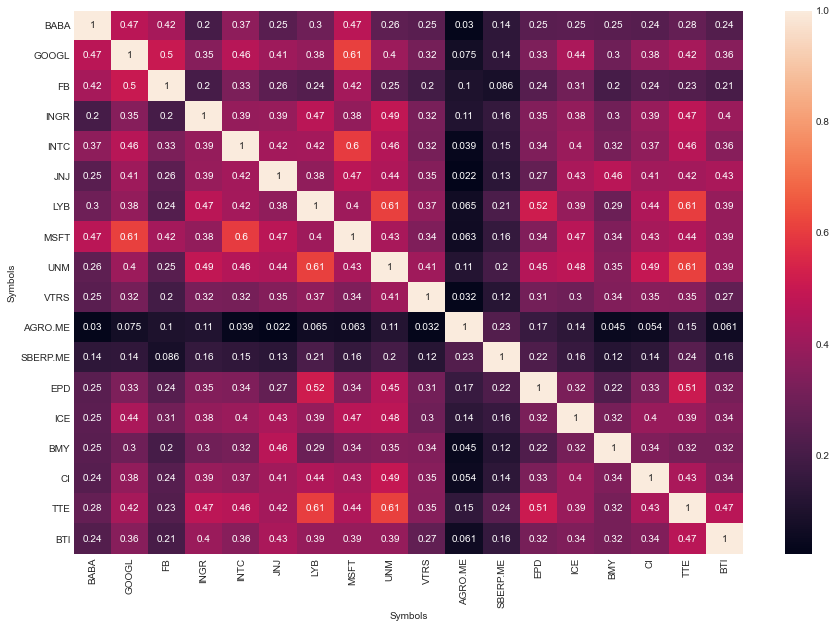

In [67]:
plt.figure(figsize=(15, 10))
sns.heatmap(data_pc.corr(), annot=True)

### Расчет максимально и минимально рискованного портфеля

In [68]:
stock_prices = pd.DataFrame(f["Close"])
stock_prices.dropna(inplace=True)
stock_prices

Symbols,BABA,GOOGL,FB,INGR,INTC,JNJ,LYB,MSFT,UNM,VTRS,AGRO.ME,SBERP.ME,EPD,ICE,BMY,CI,TTE,BTI
Date,,,,,,,,,,,,,,,,,,
2016-10-07,106.000000,800.710022,128.990005,132.720001,38.099998,119.239998,81.440002,57.799999,36.330002,35.939999,822.000000,111.220001,26.879999,53.462002,55.430000,127.230003,47.880001,60.764999
2016-10-10,108.410004,814.169983,130.240005,134.779999,38.020000,119.800003,82.260002,58.040001,36.549999,38.869999,811.000000,113.400002,27.440001,53.680000,49.810001,127.730003,48.810001,60.349998
2016-10-11,105.230003,809.570007,128.880005,133.470001,37.270000,117.639999,80.300003,57.189999,36.639999,38.310001,830.000000,113.900002,27.270000,53.070000,49.549999,125.000000,48.029999,59.564999
2016-10-12,103.620003,811.770020,129.050003,134.300003,37.130001,117.970001,80.000000,57.110001,36.869999,37.070000,847.000000,112.320000,27.230000,53.466000,50.009998,121.959999,48.349998,59.494999
2016-10-13,102.150002,804.080017,127.820000,133.550003,36.970001,118.260002,79.900002,56.919998,36.049999,37.880001,856.000000,110.650002,27.180000,53.312000,50.240002,121.160004,48.119999,60.305000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-17,211.600006,2434.870117,336.510010,91.440002,57.180000,165.220001,102.419998,260.899994,28.270000,14.670000,999.000000,291.739990,24.559999,114.019997,66.769997,236.690002,48.439999,39.700001
2021-06-18,212.300003,2402.219971,329.660004,89.989998,55.669998,161.979996,100.349998,259.429993,27.030001,14.260000,985.799988,286.690002,23.980000,112.760002,66.470001,231.970001,46.419998,38.889999
2021-06-21,211.059998,2436.250000,332.290009,90.860001,55.869999,163.839996,102.800003,262.630005,28.200001,14.350000,985.799988,285.859985,24.049999,113.699997,66.830002,236.479996,47.980000,39.450001


In [69]:
# Calculate annualised returns
annual_returns = ((((stock_prices.iloc[-1]-stock_prices.iloc[0]) / stock_prices.iloc[0]) \
                   + 1)**(252/len(stock_prices)) - 1)

In [70]:
# Create an empty dataframe
portfolio = pd.DataFrame()
weights_array = []

# Initialize the number of portfolios
num_of_portfolios = 2000

# Get the number of stocks available in the data file
num_of_stocks = stock_prices.shape[1]

# Calculate daily returns
stock_returns = stock_prices.pct_change().dropna()

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate random portfolio
    rnd_nums = list(np.random.random(num_of_stocks))
    
    # Ensure the sum of weights is 1
    weights = list(rnd_nums/sum(rnd_nums))
    
    # Save weight allocation in a list
    weights_array.append(weights)
    
    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = sum(weights * annual_returns)
    
    # Calculate the portfolio returns
    portfolio_rets = stock_returns * weights
    
    # Caclulate the portfolio standard deviation
    portfolio.loc[i, 'std_dev'] = portfolio_rets.sum(axis=1).std()*math.sqrt(252)

    # Caclulate the portfolio Sharpe 
    portfolio.loc[i, 'returns/std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

In [71]:
portfolio.loc[10, 'returns'] = sum(weights * annual_returns)
annual_returns

Symbols
BABA        0.168403
GOOGL       0.278486
FB          0.238473
INGR       -0.081938
INTC        0.085356
JNJ         0.070752
LYB         0.053862
MSFT        0.398854
UNM        -0.056797
VTRS       -0.185369
AGRO.ME     0.047008
SBERP.ME    0.231910
EPD        -0.022959
ICE         0.187494
BMY         0.036617
CI          0.142492
TTE        -0.004779
BTI        -0.093269
dtype: float64

In [72]:
# Identify the portfolio with the maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns/std_dev'].idxmax()]
wts_max_ret_by_std_dev = weights_array[portfolio['returns/std_dev'].idxmax()]

# Similarly identify the portfolio with the minimum standard deviation using idxmin() function
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
wts_min_std_dev = weights_array[portfolio['std_dev'].idxmin()]

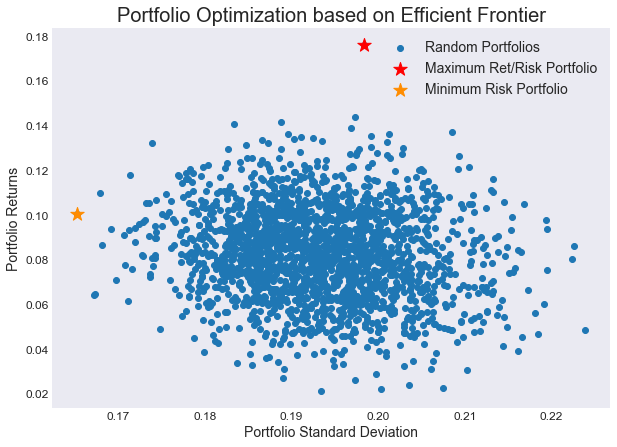

In [73]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=200, color='r', label='Maximum Ret/Risk Portfolio')
plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=200, color='darkorange', label='Minimum Risk Portfolio')
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

In [74]:
# Print the portfolio with the maximum Sharpe ratio
print("The portfolio metrics for the maximum return/std dev. portfolio:")
print(max_ret_by_std_dev)
print("\nThe portfolio weights for each stock in the maximum return/std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_max_ret_by_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the maximum return/std dev. portfolio:
returns            0.176079
std_dev            0.198350
returns/std_dev    0.887719
Name: 220, dtype: float64

The portfolio weights for each stock in the maximum return/std dev. portfolio is as:
BABA 6.15%
GOOGL 14.43%
FB 10.26%
INGR 2.02%
INTC 3.83%
JNJ 2.39%
LYB 7.53%
MSFT 13.29%
UNM 2.59%
VTRS 0.76%
AGRO.ME 1.34%
SBERP.ME 13.21%
EPD 0.61%
ICE 5.27%
BMY 3.1%
CI 4.88%
TTE 2.58%
BTI 5.78%


In [75]:
# Print the portfolio with the minimum risk
print("The portfolio metrics for the minimum std dev. portfolio:")
print(min_std_dev)
print("\nThe portfolio weights for each stock in the minimum std dev. portfolio is as:")
for i,j in zip(stock_prices.columns,wts_min_std_dev):
    print("{} {}%".format(i,round(j*100,2))) 

The portfolio metrics for the minimum std dev. portfolio:
returns            0.100336
std_dev            0.165315
returns/std_dev    0.606937
Name: 1830, dtype: float64

The portfolio weights for each stock in the minimum std dev. portfolio is as:
BABA 8.48%
GOOGL 2.77%
FB 0.37%
INGR 11.85%
INTC 2.1%
JNJ 8.44%
LYB 0.18%
MSFT 6.84%
UNM 1.86%
VTRS 0.07%
AGRO.ME 10.47%
SBERP.ME 13.27%
EPD 2.69%
ICE 7.17%
BMY 9.42%
CI 1.78%
TTE 11.44%
BTI 0.8%


In [76]:
data_pc

Symbols,BABA,GOOGL,FB,INGR,INTC,JNJ,LYB,MSFT,UNM,VTRS,AGRO.ME,SBERP.ME,EPD,ICE,BMY,CI,TTE,BTI
Date,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,0.010920,NaN,0.015395,0.023529,0.004192,NaN,0.015420,0.021516,0.015735,NaN,NaN,0.039795,0.005076,0.015050,0.031188,0.028732,0.008506
2010-01-05,NaN,-0.004404,NaN,0.016846,-0.000479,-0.011596,NaN,0.000323,0.014544,-0.010684,NaN,NaN,0.011023,-0.037654,-0.015607,0.016772,0.002277,-0.001074
2010-01-06,NaN,-0.025209,NaN,0.015905,-0.003354,0.008134,NaN,-0.006137,0.008898,-0.009719,NaN,NaN,0.001817,-0.030841,-0.000396,-0.002163,-0.000303,-0.003224
2010-01-07,NaN,-0.023280,NaN,-0.044684,-0.009615,-0.007137,NaN,-0.010400,0.022048,-0.016903,NaN,NaN,-0.025091,0.027263,0.000793,0.036856,-0.002273,0.006776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-18,0.003308,-0.013409,-0.020356,-0.015857,-0.026408,-0.019610,-0.020211,-0.005634,-0.043863,-0.027948,-0.013213,-0.017310,-0.023616,-0.011051,-0.004493,-0.019942,-0.041701,-0.020403
2021-06-21,-0.005841,0.014166,0.007978,0.009668,0.003593,0.011483,0.024415,0.012335,0.043285,0.006311,0.000000,-0.002895,0.002919,0.008336,0.005416,0.019442,0.033606,0.014400
2021-06-22,0.001232,0.004252,0.020283,-0.002751,0.000000,-0.001343,0.001654,0.010966,-0.012057,-0.009059,0.013593,-0.000560,0.003326,0.006596,-0.013317,-0.001987,-0.002056,-0.009886


In [81]:
import mibian
from tabulate import tabulate
c = mibian.BS([55.26, 57.50, 0, 2], volatility=32)


In [82]:
c.callPrice

0.02578846061142226

In [83]:
c.putPrice

2.265788460611418

In [84]:
stock_price = 55.26
strike_price = 57.50
interest_rate = 0
days_to_expiry = 2
volatility = 32

In [85]:
greeks = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility)

In [86]:
print(
    tabulate(
        [
            ['Delta',greeks.callDelta],
            ['Gamma',greeks.gamma],
            ['Vega',greeks.vega],
            ['Theta',greeks.callTheta],
            ['Rho',greeks.callRho]
        ],
        headers=['Greeks','Value'],tablefmt='orgtbl'))
print("")
print("The Call price is:",greeks.callPrice)

| Greeks   |        Value |
|----------+--------------|
| Delta    |  0.0478913   |
| Gamma    |  0.0761251   |
| Vega     |  0.00407602  |
| Theta    | -0.0326082   |
| Rho      |  0.000143599 |

The Call price is: 0.02578846061142226


In [87]:
print(
    tabulate(
        [
            ['Delta', greeks.putDelta],
            ['Gamma', greeks.gamma],
            ['Vega', greeks.vega],
            ['Theta', greeks.putTheta],
            ['Rho', greeks.putRho]
        ],
        headers=['Greeks', 'Value'], tablefmt='orgtbl'))
print("")
print("The Put price is:",greeks.putPrice)
print("The Call price is:",greeks.callPrice)

| Greeks   |       Value |
|----------+-------------|
| Delta    | -0.952109   |
| Gamma    |  0.0761251  |
| Vega     |  0.00407602 |
| Theta    | -0.0326082  |
| Rho      | -0.00300709 |

The Put price is: 2.265788460611418
The Call price is: 0.02578846061142226


In [88]:
# Define parameters for call option contract
stock_price = 100
strike_price = 100
interest_rate = 0
days_to_expiry = 40
volatility = 38.09

# Compute greeks
greeks_stock_price_100 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility)

# Print Delta and Gamma
print(tabulate(
        [             
            ['Stock Price', 100],
            ['Call Price', greeks_stock_price_100.callPrice],
            ['Delta', greeks_stock_price_100.callDelta],
            ['Gamma', greeks_stock_price_100.gamma]            
        ], 
        tablefmt='orgtbl'))

| Stock Price | 100         |
| Call Price  |   5.02709   |
| Delta       |   0.525135  |
| Gamma       |   0.0315757 |


In [89]:
# Change in stock price is INR 1 from 100 to 101
call_price_at_101 = greeks_stock_price_100.callPrice \
                  + greeks_stock_price_100.callDelta * (101 - 100) \
                  + 0.5 * greeks_stock_price_100.gamma * (101 - 100)**2
print(call_price_at_101)

5.56801680203463


In [90]:
stock_price = 101
actual_call_price_at_101 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility).callPrice

print(actual_call_price_at_101)

5.567930205927425


In [91]:
# Define parameters for call option contract
stock_price = 100
strike_price = 100
interest_rate = 0
days_to_expiry = 40
volatility = 30

# Compute greeks
greeks_stock_price_100 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility)

# Print Vega
print (tabulate(
        [             
            ['Stock Price', 100],
            ['Call Price', greeks_stock_price_100.callPrice],
            ['Vega', greeks_stock_price_100.vega]                       
        ], 
        tablefmt='orgtbl'))

| Stock Price | 100        |
| Call Price  |   3.96038  |
| Vega        |   0.131904 |


In [92]:
call_price_at_31 = greeks_stock_price_100.callPrice \
                  + greeks_stock_price_100.vega * (0.31 - 0.30) * 100
                  
print(call_price_at_31)

4.092280217433506


In [93]:
volatility = 31
actual_call_price_at_31 = mibian.BS([stock_price, strike_price, interest_rate, days_to_expiry], \
                   volatility=volatility).callPrice

print(actual_call_price_at_31)

4.092274736640356


In [94]:

nifty_nov_fut = 10350.00
nifty_dec_fut = 10387.00

strike_price = 10400
nov_call_price = 50.50
dec_call_price = 148.50
setup_cost = dec_call_price - nov_call_price

# Today's date is 21 November 2017. Therefore, days to November expiry is 7 days and days to December expiry is 34 days.
days_to_expiry_nov_call = 7
days_to_expiry_dec_call = 34

# Range of values for Nifty
sT = np.arange(0.92*nifty_nov_fut,1.1*nifty_nov_fut,1) 

# Interest rate for input to Black-Scholes model
interest_rate = 0.0

In [95]:

nov_call_iv = mibian.BS([nifty_nov_fut, strike_price, interest_rate, days_to_expiry_nov_call], 
                        callPrice=nov_call_price).impliedVolatility
print("Front Month IV %.2f" % nov_call_iv,"%")

# Back-month IV
dec_call_iv = mibian.BS([nifty_dec_fut, strike_price, interest_rate, days_to_expiry_dec_call], 
                        callPrice=dec_call_price).impliedVolatility
print("Back Month IV %.2f" % dec_call_iv,"%")

Front Month IV 12.70 %
Back Month IV 12.25 %


In [96]:

days_to_expiry_nov_call = 0.001
days_to_expiry_dec_call = 29 - days_to_expiry_nov_call

df = pd.DataFrame()
df['nifty_price'] = sT
df['nov_call_price'] = np.nan
df['dec_call_price'] = np.nan

# Calculating call price for different possible values of Nifty
for i in range(0,len(df)):
    df.loc[i,'nov_call_price'] = mibian.BS([df.iloc[i]['nifty_price'], strike_price, interest_rate, days_to_expiry_nov_call], 
                                           volatility=nov_call_iv).callPrice
    
    # Since interest rate is considered 0%, 35 is added to the nifty price to get the Nifty December futures price. 
    df.loc[i,'dec_call_price'] = mibian.BS([df.iloc[i]['nifty_price']+35, strike_price, interest_rate, days_to_expiry_dec_call], 
                                           volatility=dec_call_iv).callPrice
df.head()

,nifty_price,nov_call_price,dec_call_price
0,9522.0,0.0,0.806387
1,9523.0,0.0,0.813929
2,9524.0,0.0,0.821534
3,9525.0,0.0,0.829203
4,9526.0,0.0,0.836937


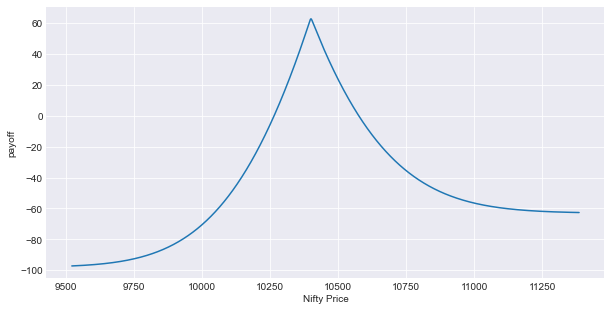

In [97]:
df['payoff'] = df.dec_call_price - df.nov_call_price - setup_cost
plt.figure(figsize=(10,5))
plt.ylabel("payoff")
plt.xlabel("Nifty Price")
plt.plot(sT,df.payoff)
plt.show()